In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
flight_data = pd.read_csv('flight_data_momondo_All_combined_Cloud.csv')

# Remove dollar sign and commas, convert to numeric
flight_data['Price'] = flight_data['Price'].replace({'\$': '', ',': ''}, regex=True)

# Convert 'Price' to numeric, coercing errors to NaN
flight_data['Price'] = pd.to_numeric(flight_data['Price'], errors='coerce')

# Drop rows with NaN in 'Price'
flight_data_cleaned = flight_data.dropna(subset=['Price'])


C:\Users\liort\AppData\Local\Temp\ipykernel_18132\1954927438.py:6: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.read_csv('flight_data_momondo_All_combined_Cloud.csv')


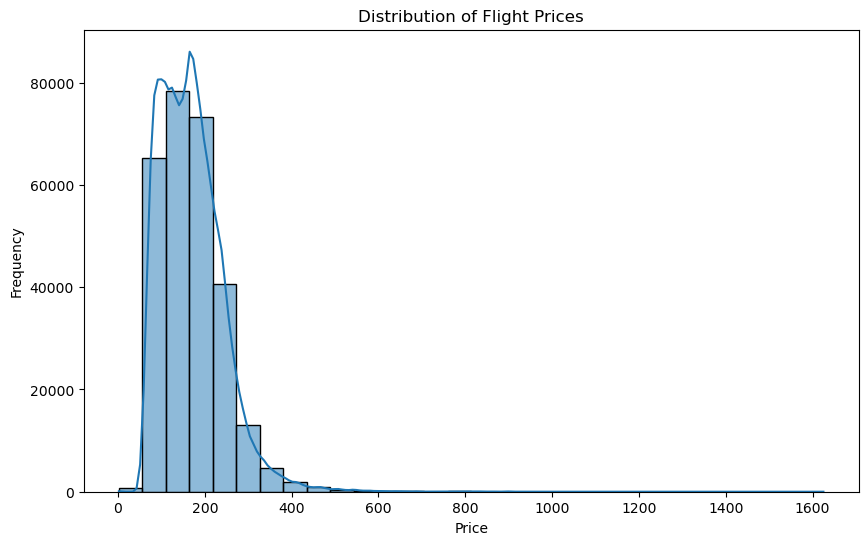

In [30]:
#2
# Plot distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(flight_data_cleaned['Price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

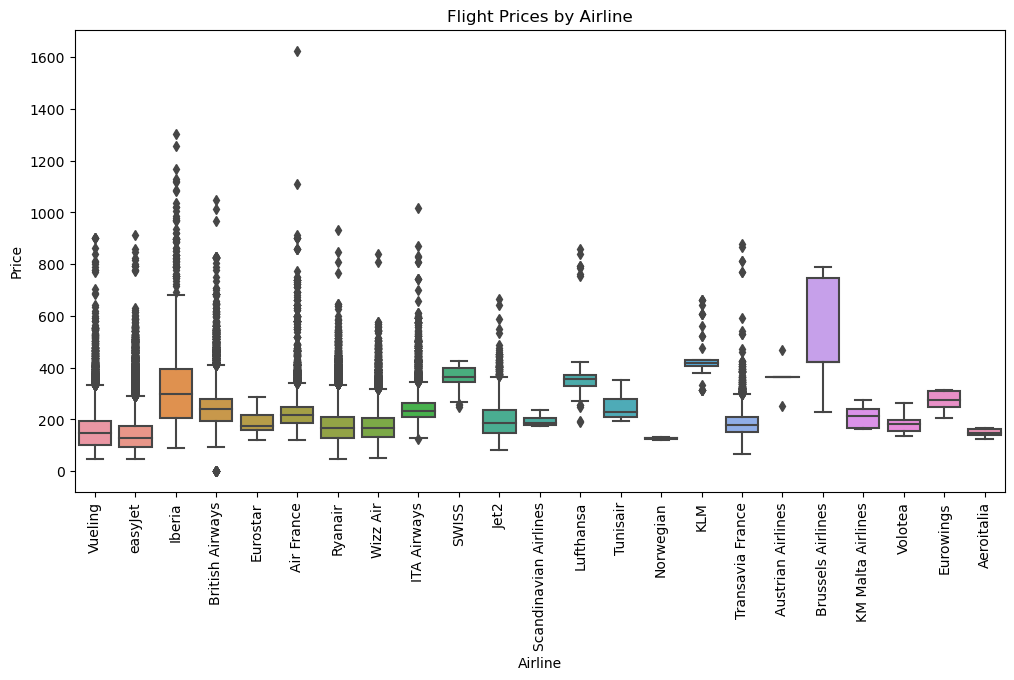

In [32]:
#3
# Plot distribution of flight prices by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='Back Company', y='Price', data=flight_data_cleaned)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

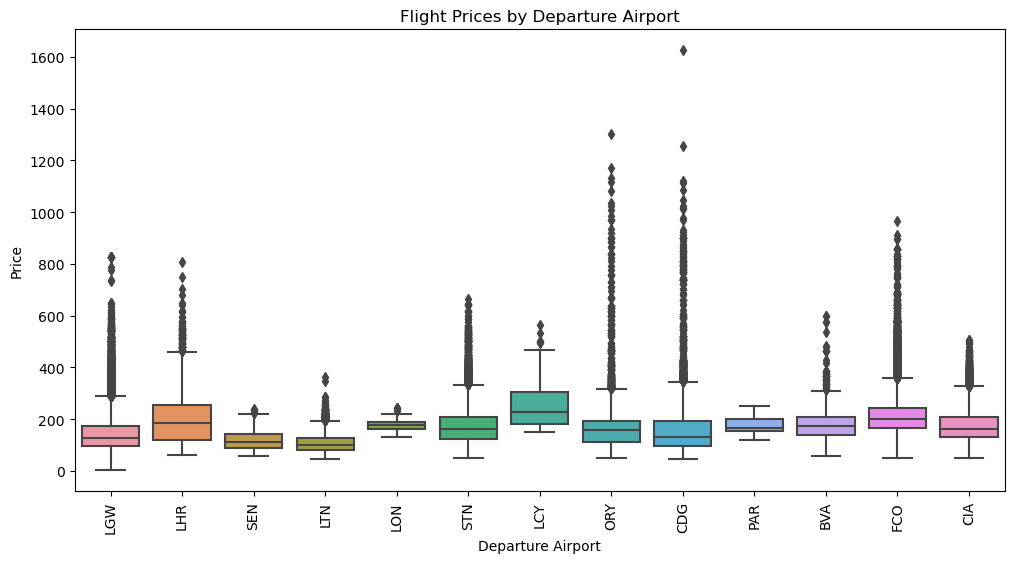

In [33]:
#4
# Plot distribution of flight prices by departure airport
plt.figure(figsize=(12, 6))
sns.boxplot(x='From Airport', y='Price', data=flight_data_cleaned)
plt.title('Flight Prices by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


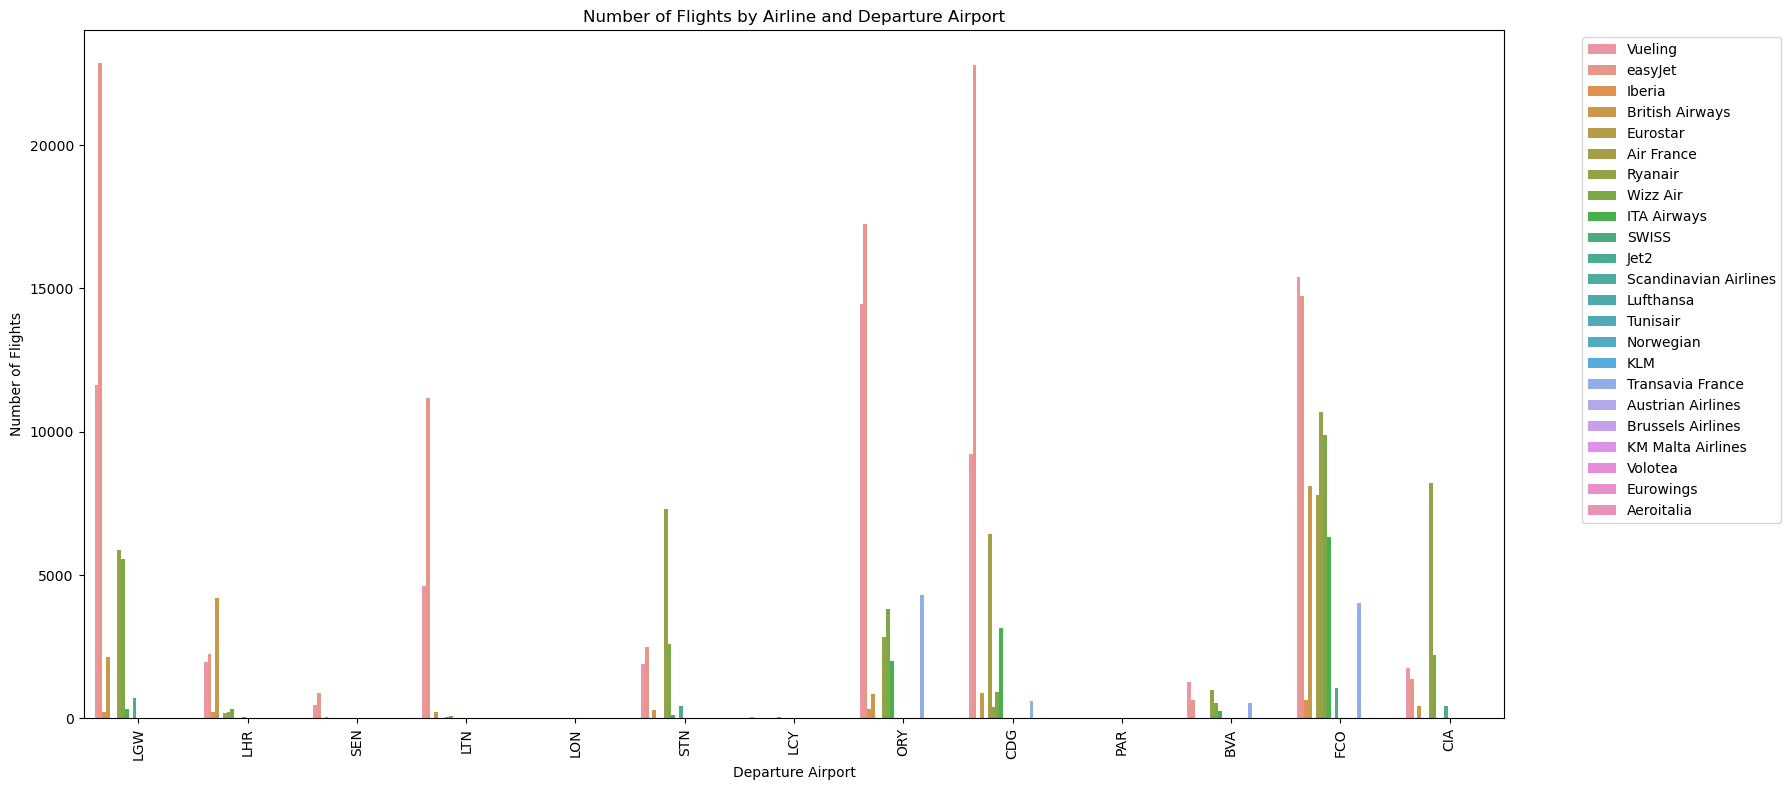

In [38]:
# Plot distribution of flight counts by airline and departure airport
plt.figure(figsize=(18, 8))
sns.countplot(x='From Airport', hue='Back Company', data=flight_data_cleaned)

# Move the legend to the right
plt.title('Number of Flights by Airline and Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves the legend to the side
plt.tight_layout()  # Ensures everything fits well
plt.show()

In [40]:
import re

# Function to convert durations to minutes
def convert_duration_to_minutes(duration):
    if 'nonstop' in duration.lower():
        return 0
    hours, minutes = 0, 0
    # Extract hours and minutes from the string (like "1h 15m")
    match = re.match(r'(\d+)h (\d+)m', duration)
    if match:
        hours, minutes = int(match.group(1)), int(match.group(2))
        return hours * 60 + minutes
    # If it's only hours (e.g., "2h")
    match = re.match(r'(\d+)h', duration)
    if match:
        return int(match.group(1)) * 60
    # If it's only minutes (e.g., "30m")
    match = re.match(r'(\d+)m', duration)
    if match:
        return int(match.group(1))
    return 0  # In case no valid format found

# Apply the conversion function to 'Dep Duration' column
flight_data['Dep Duration Minutes'] = flight_data['Dep Duration'].apply(lambda x: convert_duration_to_minutes(str(x)))

# Display the first few rows to confirm the new column
flight_data[['Dep Duration', 'Dep Duration Minutes']].head()


,Dep Duration,Dep Duration Minutes
0,1h 15m,75
1,1h 30m,90
2,1h 15m,75
3,1h 20m,80
4,1h 20m,80


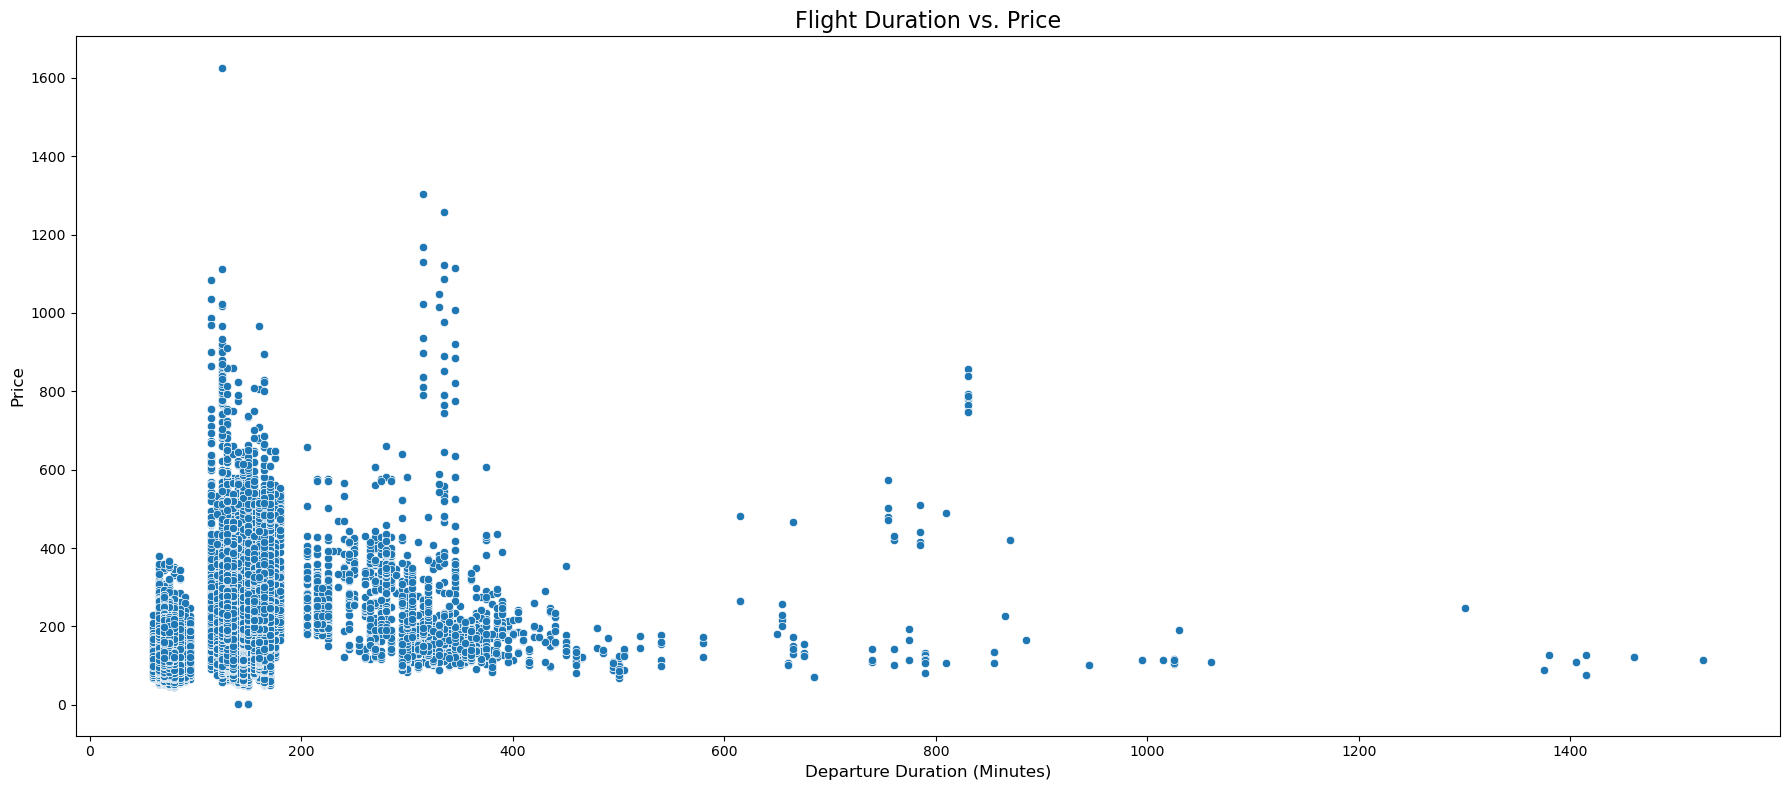

In [42]:
# Plot distribution of flight durations (Departure Duration) and price using a scatter plot
plt.figure(figsize=(18, 8))  # Make the figure wider for better visualization
sns.scatterplot(x='Dep Duration Minutes', y='Price', data=flight_data)

# Set the title and labels
plt.title('Flight Duration vs. Price', fontsize=16)
plt.xlabel('Departure Duration (Minutes)', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


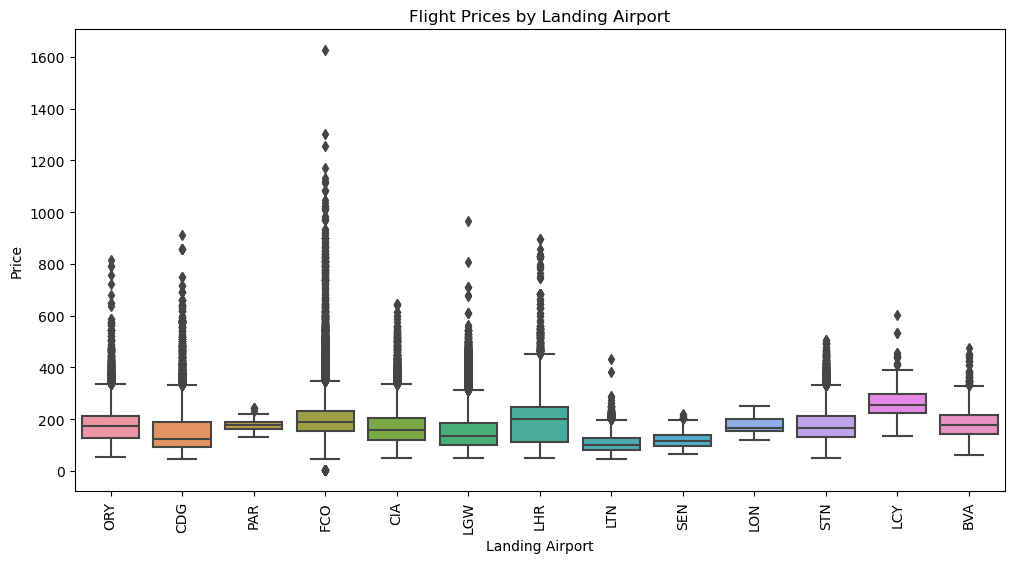

In [9]:
#7
# Plot distribution of prices by landing airport
plt.figure(figsize=(12, 6))
sns.boxplot(x='Landing Airport', y='Price', data=flight_data_cleaned)
plt.title('Flight Prices by Landing Airport')
plt.xlabel('Landing Airport')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()


In [44]:
# שמירת הנתונים לאחר עיבוד
flight_data.to_csv('flight_data_Momondo_Allsnaps_AfterStep2_Clean.csv', index=False)
print(f"flight_data_Momondo_Allsnaps_AfterStep2_Clean.csv")

flight_data_Momondo_Allsnaps_AfterStep2_Clean.csv
